<a href="https://colab.research.google.com/github/sudharshanpaul/Machine-Learning/blob/main/LinearAlgebra_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eigen Decomposition

### Affine Transformation via Matrix Applications

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
v = np.array([3,1])
v

array([3, 1])

In [ ]:
def plot_vectors(vectors,colors):
  plt.figure()
  plt.axvline(x=0,color='lightgray')
  plt.axhline(y=0,color='lightgray')
  for i in range(len(vectors)):
    x=np.concatenate([[0,0],vectors[i]])
    plt.quiver([x[0]],[x[1]],[x[2]],[x[3]],angles='xy',scale_units='xy',scale=1,color=colors[i])

(-1.0, 5.0)

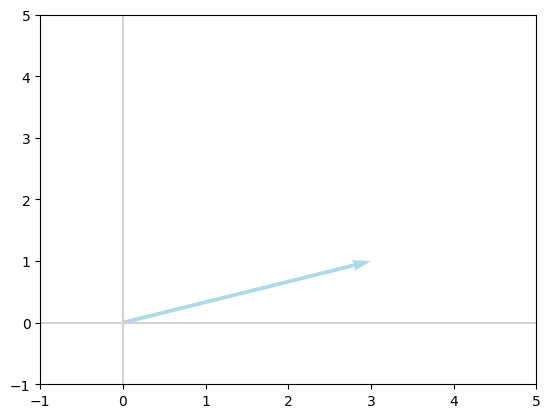

In [ ]:
plot_vectors([v],['lightblue'])
plt.xlim(-1,5)
plt.ylim(-1,5)

"Applying" a matrix to a vector (i.e performing matrix-vector multiplication) can linearly transform the vector e.g rotate it or rescale it
The identity matrix is the exception that proves the rule, Applying a identity matrix does not transforms the vector

In [ ]:
I = np.identity(2)
I

array([[1., 0.],
       [0., 1.]])

In [ ]:
Iv = np.dot(I,v)
Iv

array([3., 1.])

(-1.0, 5.0)

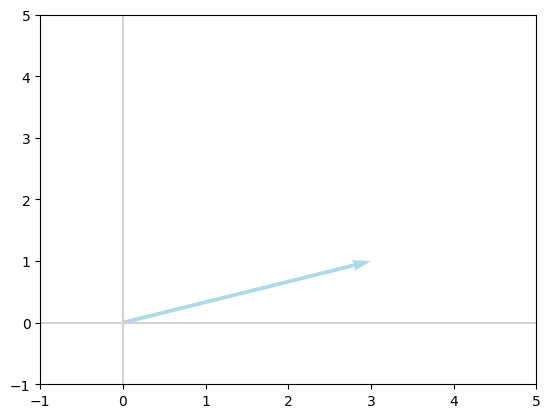

In [ ]:
plot_vectors([Iv],['lightblue'])
plt.xlim([-1,5])
plt.ylim([-1,5])

In [ ]:
E = np.array([[1,0],[0,-1]])  # which is used to flip the vector about X-Axis
E

array([[ 1,  0],
       [ 0, -1]])

In [ ]:
Ev = np.matmul(E,v)
Ev

array([ 3, -1])

(-3.0, 5.0)

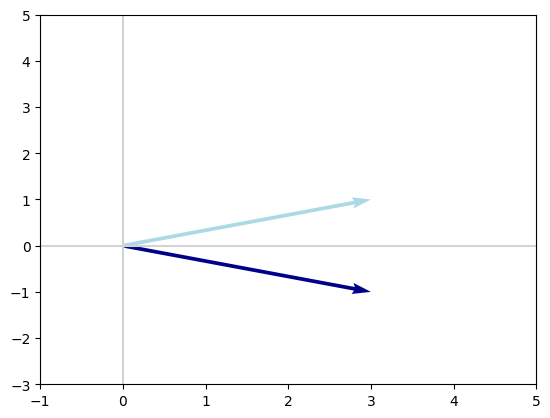

In [ ]:
plot_vectors([Ev,v],['darkblue','lightblue'])
plt.xlim([-1,5])
plt.ylim([-3,5])

In [ ]:
F = np.array([[-1,0],[0,1]])  # which is used to flip the vector about X-Axis
F

array([[-1,  0],
       [ 0,  1]])

In [ ]:
Fv = np.dot(F,v)
Fv

array([-3,  1])

(-3.0, 5.0)

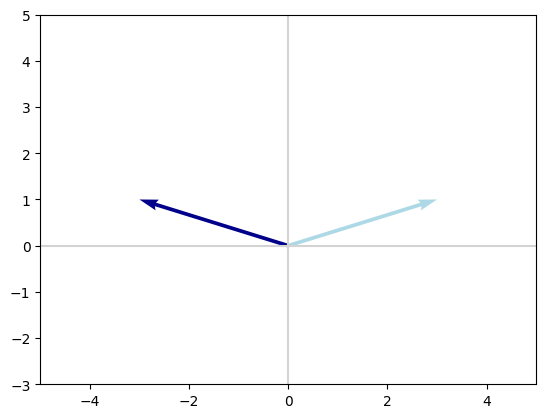

In [ ]:
plot_vectors([Fv,v],['darkblue','lightblue'])
plt.xlim([-5,5])
plt.ylim([-3,5])

In [ ]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [ ]:
Av = np.dot(A,v)
Av

array([1, 4])

(-3.0, 5.0)

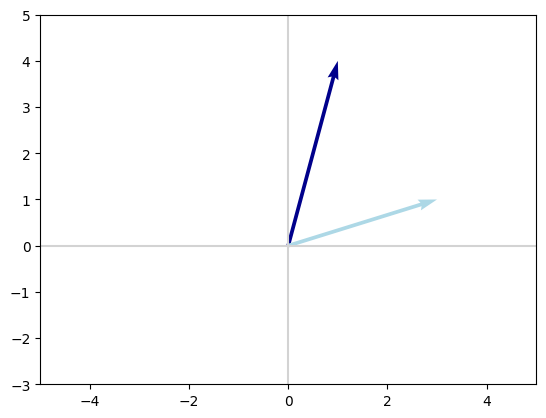

In [ ]:
plot_vectors([Av,v],['darkblue','lightblue'])
plt.xlim([-5,5])
plt.ylim([-3,5])

(-3.0, 5.0)

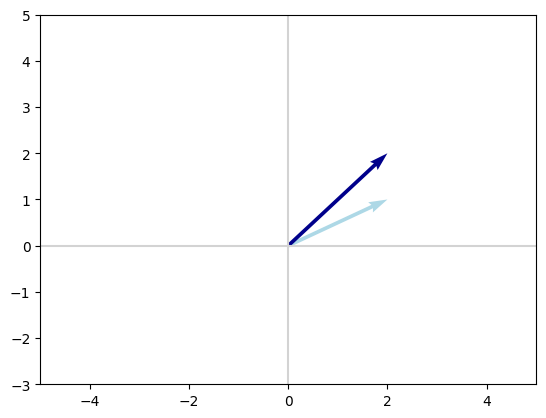

In [ ]:
v2 = np.array([2,1])
plot_vectors([v2,np.dot(A,v2)],['lightblue','darkblue'])
plt.xlim([-5,5])
plt.ylim([-3,5])

We can concatenate several vectors into a matrix where each column in a seperate vector. Then whatever linear transformations we apply to V will be independently applied to each column(vector)

In [ ]:
v1 = np.array([3,1])
v2 = np.array([2,2])
v3 = np.array([0,-1])
v4 = np.array([1,1])

V = np.concatenate((np.matrix(v1).T,np.matrix(v2).T,np.matrix(v3).T,np.matrix(v4).T),axis=1)

In [ ]:
V

matrix([[ 3,  2,  0,  1],
        [ 1,  2, -1,  1]])

In [ ]:
np.dot(np.identity(2),V)

matrix([[ 3.,  2.,  0.,  1.],
        [ 1.,  2., -1.,  1.]])

In [ ]:
AV = np.dot(A,V)

In [ ]:
# Function to return column of matrix to 1D vector
def vectorfy(mtx,col):
  return np.array(mtx[:,col]).reshape(-1)

In [ ]:
vectorfy(V,0)

array([3, 1])

In [ ]:
vectorfy(V,0)==v1

array([ True,  True])

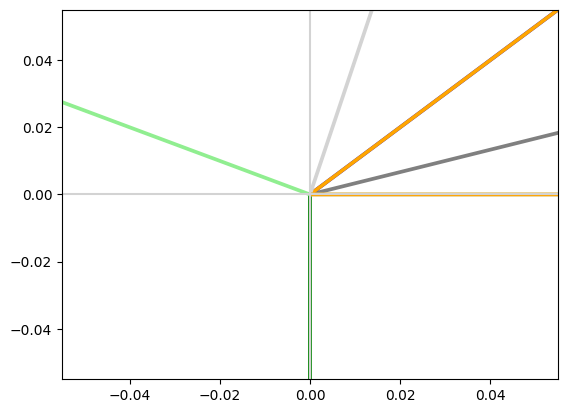

In [ ]:
plot_vectors([vectorfy(V,0),vectorfy(V,1),vectorfy(V,2),vectorfy(V,3),vectorfy(AV,0),vectorfy(AV,1),vectorfy(AV,2),vectorfy(AV,3)],['gray','blue','green','orange','lightgray','lightblue','lightgreen','orange'])

# Eigen Vectors and Eigen Values

Eigen Vecotor: It is a vector " v " such that if it is transformed with a vector A i.e Av then v retains its direction is called Eigen vector
            Av = kv where k is a scalar called eigen vector

Eigen Value: A scalar which satisfies the following equation Av = kv

In [ ]:
A = np.array([[-1,4],[2,-2]])

In [ ]:
lambdas, V = np.linalg.eig(A)

In [ ]:
V

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

Eigen value corresponding to each eigen vector

In [ ]:
lambdas

array([ 1.37228132, -4.37228132])

In [ ]:
v1 = V[:,0]
v2 = V[:,1]
lam1 = lambdas[0]
lam2 = lambdas[1]

In [ ]:
Av = np.dot(A,V)
Av

array([[ 1.18031462,  3.34281692],
       [ 0.70000958, -2.81822977]])

In [ ]:
lam1*v1

array([1.18031462, 0.70000958])

In [ ]:
lam2*v2

array([ 3.34281692, -2.81822977])

In [ ]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [ ]:
Av = np.dot(A,v)

(-1.0, 2.0)

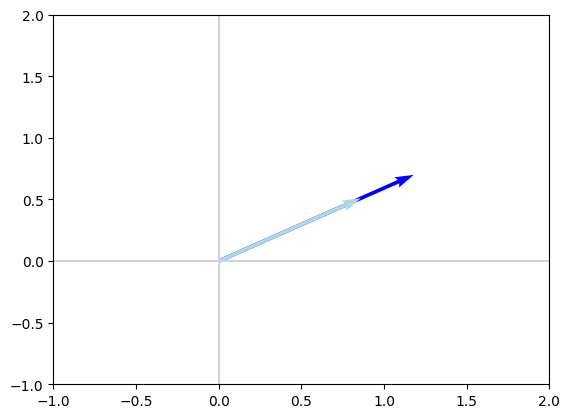

In [ ]:
plot_vectors([Av,v],['blue','lightblue'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [ ]:
Av2 = np.dot(A,v2)
Av2

array([ 3.34281692, -2.81822977])

(-3.0, 2.0)

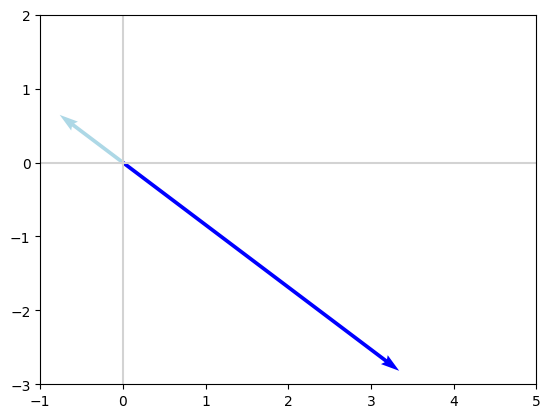

In [ ]:
plot_vectors([Av2,v2],['blue','lightblue'])
plt.xlim(-1,5)
plt.ylim(-3,2)

In [ ]:
A_p = torch.tensor([[-1,4],[2,-2.]])
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [ ]:
eigenValues,eigens = torch.linalg.eig(A_p)


In [ ]:
v_p = eigens[:,0]
v_p

tensor([0.8601+0.j, 0.5101+0.j])

In [ ]:
e1_p = eigenValues[0]
e1_p

tensor(1.3723+0.j)

In [ ]:
Av1_p = torch.matmul(A_p,torch.real(v_p))
Av1_p

tensor([1.1803, 0.7000])

In [ ]:
e1_p*v_p

tensor([1.1803+0.j, 0.7000+0.j])

(-1.0, 2.0)

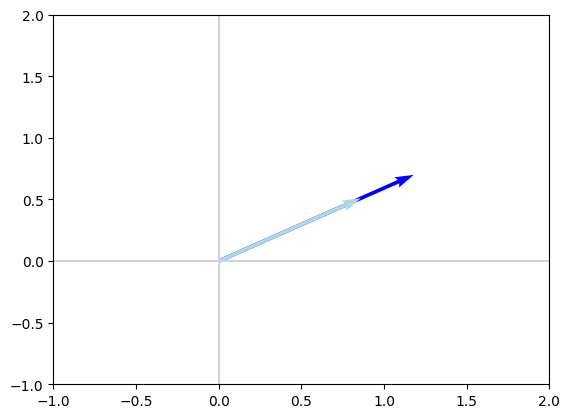

In [ ]:
plot_vectors([Av1_p,torch.real(v_p)],['blue','lightblue'])
plt.xlim(-1,2)
plt.ylim(-1,2)

### Eigen Vectors and Eigen Values >2D

In [ ]:
X_p = torch.tensor([[25,2,9],[34,6.,8],[9,4,6]])

In [ ]:
eigVal_p, eigVec = torch.linalg.eig(X_p)

In [ ]:
eigVec

tensor([[-0.5461+0.0000j, -0.0681+0.2204j, -0.0681-0.2204j],
        [-0.7821+0.0000j,  0.7701+0.0000j,  0.7701-0.0000j],
        [-0.3000+0.0000j, -0.0866-0.5884j, -0.0866+0.5884j]])

In [ ]:
eigVal_p

tensor([32.8089+0.0000j,  2.0955+3.6199j,  2.0955-3.6199j])

## Matrix Determinanta

In [ ]:
N = np.array([[-2,4],[6,7]])
N

array([[-2,  4],
       [ 6,  7]])

In [ ]:
np.linalg.det(N)

-37.99999999999999

In [ ]:
N = np.array([[-4,1],[-8,2]])
np.linalg.det(N)

0.0

In [ ]:
#np.linalg.inv(N)

In [ ]:
N_p = torch.tensor([[-2,4.],[6,7]])
N_p

tensor([[-2.,  4.],
        [ 6.,  7.]])

In [ ]:
torch.det(N_p)

tensor(-38.)

### Relation b/w Determinants and Eigen Values

In [ ]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [ ]:
np.linalg.det(X)

19.999999999999996

In [ ]:
lambdas, V = np.linalg.eig(X)

In [ ]:
np.product(lambdas)

19.99999999999999

In [ ]:
A = np.array([[-4,1],[-8,2]])
A

array([[-4,  1],
       [-8,  2]])

In [ ]:
I2 = np.identity(2)
I2

array([[1., 0.],
       [0., 1.]])

(-3.0, 5.0)

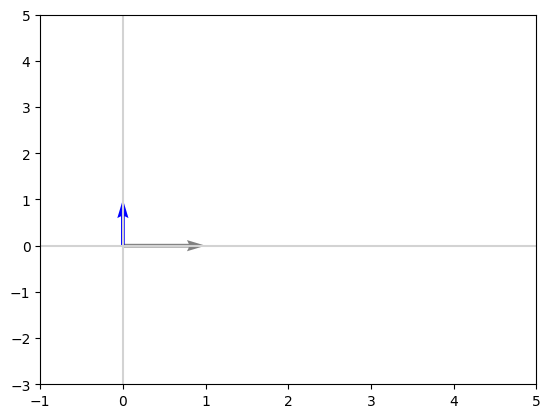

In [ ]:
plot_vectors([vectorfy(I2,0),vectorfy(I2,1)],['gray','blue'])
plt.xlim(-1,5)
plt.ylim(-3,5)   # here the volume / Area is 1 unit

In [ ]:
# As A is a singular matrix the volume should be collapsed
AI2 = np.dot(A,I2)
AI2

array([[-4.,  1.],
       [-8.,  2.]])

(-10.0, 5.0)

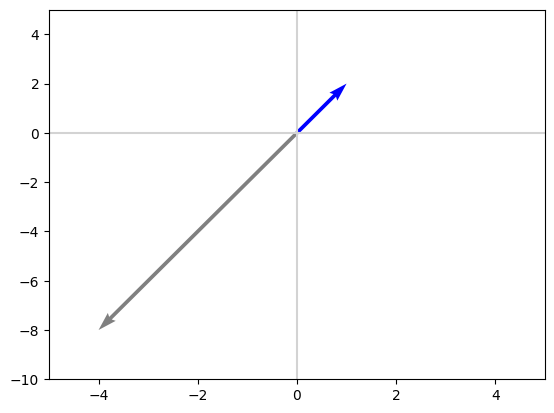

In [ ]:
plot_vectors([vectorfy(AI2,0),vectorfy(AI2,1)],['gray','blue'])
plt.xlim(-5,5)
plt.ylim(-10,5)

In [ ]:
lambdas,eigens = np.linalg.eig(A)
lambdas

array([-2.,  0.])

In [ ]:
B = np.array([[-1,4],[2,-2]])
B

array([[-1,  4],
       [ 2, -2]])

(-4.0, 5.0)

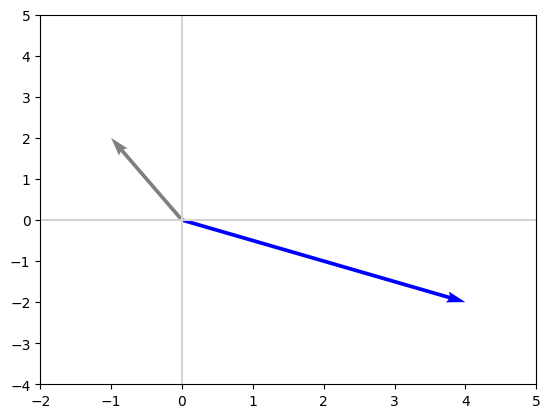

In [ ]:
plot_vectors([vectorfy(B,0),vectorfy(B,1)],['gray','blue'])
plt.xlim(-2,5)
plt.ylim(-4,5)

In [ ]:
BI2 = np.dot(B,I2)
BI2

array([[-1.,  4.],
       [ 2., -2.]])

(-4.0, 5.0)

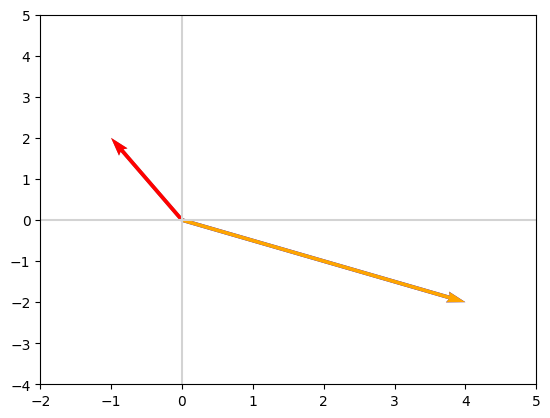

In [ ]:
plot_vectors([vectorfy(BI2,0),vectorfy(BI2,1),vectorfy(B,0),vectorfy(B,1)],['gray','blue','red','orange'])
plt.xlim(-2,5)
plt.ylim(-4,5)

In [ ]:
lambdas,eigens = np.linalg.eig(I2)
lambdas

array([1., 1.])

(-1.0, 3.0)

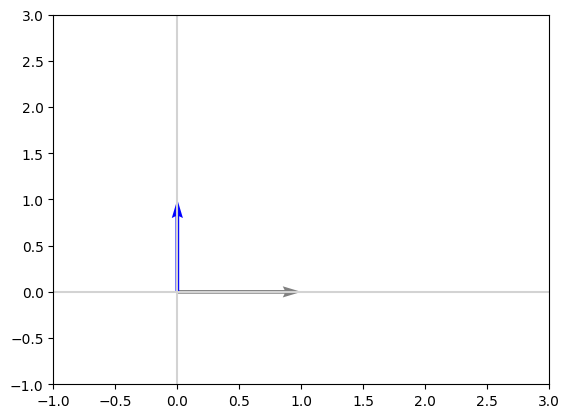

In [ ]:
B = np.array([[1,0],[0,1]])
plot_vectors([vectorfy(B,0),vectorfy(B,1)],['gray','blue'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [ ]:
J = np.array([[-.5,0],[0,2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [ ]:
np.linalg.det(J)

-1.0

In [ ]:
np.abs(np.linalg.det(J))

1.0

In [ ]:
JB = np.dot(J,B)

In [ ]:
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

(-1.0, 3.0)

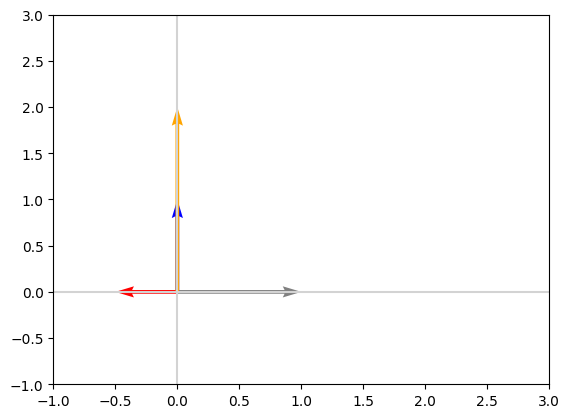

In [ ]:
plot_vectors([vectorfy(B,0),vectorfy(B,1),vectorfy(JB,0),vectorfy(JB,1)],['gray','blue','red','orange'])
plt.xlim(-1,3)
plt.ylim(-1,3)  # here the volume retains same

In [ ]:
lambdas,eigens = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

In [ ]:
D = B*2
D

array([[2, 0],
       [0, 2]])

In [ ]:
np.linalg.det(D)

4.0

In [ ]:
DB = np.dot(D,B)
DB

array([[2, 0],
       [0, 2]])

(-1.0, 3.0)

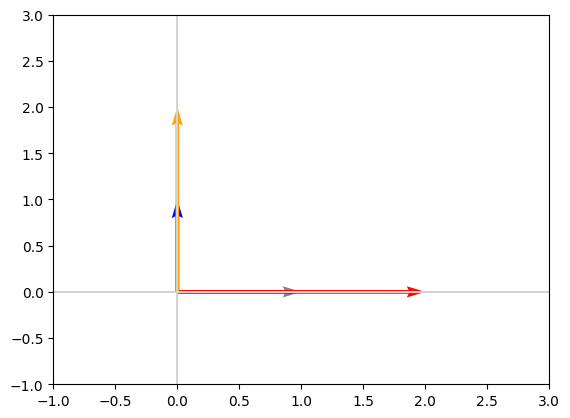

In [ ]:
plot_vectors([vectorfy(B,0),vectorfy(B,1),vectorfy(DB,0),vectorfy(DB,1)],['gray','blue','red','orange'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [ ]:
lambdas,eigens = np.linalg.eig(D)
lambdas

array([2., 2.])

## Eigen Decomposition

In [ ]:
A = np.array([[4,2],[-5,-3]])
A

array([[ 4,  2],
       [-5, -3]])

In [ ]:
lambdas, V = np.linalg.eig(A)

In [ ]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [ ]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [ ]:
Ldiag = np.diag(lambdas)
Ldiag

array([[ 2.,  0.],
       [ 0., -1.]])

In [ ]:
np.dot(V,np.dot(Ldiag,Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

It is not possible to find the eigen decomposition of all matrices
But generally we only use symmetric matrices in Machine Learning
Therefore.,
Eigen decomposition

In [ ]:
A = np.array([[2,1],[1,2]])
A

array([[2, 1],
       [1, 2]])

In [ ]:
lambdas, Q = np.linalg.eig(A)

In [ ]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
lambdas

array([3., 1.])

In [ ]:
# For symmetric matrices
np.dot(Q,np.dot(np.diag(lambdas),Q.T))

array([[2., 1.],
       [1., 2.]])

#### Eigen decomposition using PyTorch

In [ ]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [ ]:
l_p,V_p = torch.linalg.eig(P)

In [ ]:
V_p

tensor([[ 0.9511+0.j, -0.2386+0.j,  0.1626+0.j],
        [ 0.1218+0.j, -0.1924+0.j, -0.7705+0.j],
        [ 0.2837+0.j, -0.9519+0.j,  0.6163+0.j]])

In [ ]:
l_p

tensor([23.7644+0.j,  6.6684+0.j, -3.4328+0.j])

In [ ]:
V_pinv = torch.linalg.inv(V_p)
V_pinv

tensor([[ 1.1356+0.j,  0.0102+0.j, -0.2868+0.j],
        [ 0.3914+0.j, -0.7198-0.j, -1.0032-0.j],
        [ 0.0817+0.j, -1.1164-0.j,  0.2052+0.j]])

In [ ]:
d_p = torch.diag(l_p)
d_p

tensor([[23.7644+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  6.6684+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -3.4328+0.j]])

In [ ]:
torch.matmul(V_p,torch.matmul(d_p,V_pinv))

tensor([[25.0000+0.j,  2.0000+0.j, -5.0000+0.j],
        [ 3.0000+0.j, -2.0000+0.j,  1.0000+0.j],
        [ 5.0000+0.j,  7.0000+0.j,  4.0000+0.j]])

# Singular Value Decomposition (SVD)
For further reference : https://chatgpt.com/c/02df4436-95b2-41f8-89a3-a69f66304249

In [ ]:
# Let's take a non square matrix
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [ ]:
U,d,VT = np.linalg.svd(A)

In [ ]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [ ]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [ ]:
d

array([8.66918448, 4.10429538])

In [ ]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [ ]:
# For performing Matrix multiplication
D = np.concatenate((np.diag(d),[[0,0]]),axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [ ]:
np.dot(U,np.dot(D,VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

In [ ]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [ ]:
U,d,VT = torch.linalg.svd(P)

In [ ]:
U

tensor([[-0.9757,  0.1823,  0.1214],
        [-0.0975,  0.1350, -0.9860],
        [-0.1961, -0.9739, -0.1140]])

In [ ]:
VT

tensor([[-0.9810, -0.1196,  0.1528],
        [ 0.0113, -0.8211, -0.5706],
        [-0.1937,  0.5581, -0.8069]])

In [ ]:
d

tensor([26.1632,  8.1875,  2.5395])

In [ ]:
D = torch.diag(d)

In [ ]:
torch.matmul(U,torch.matmul(D,VT))

tensor([[25.0000,  2.0000, -5.0000],
        [ 3.0000, -2.0000,  1.0000],
        [ 5.0000,  7.0000,  4.0000]])

## Image compression via SVD

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ObeaDog.png to ObeaDog.png


In [ ]:
from PIL import Image

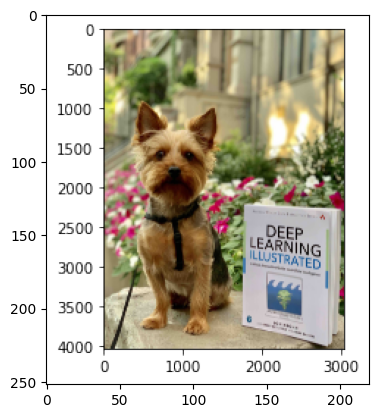

In [ ]:
img = Image.open('ObeaDog.png')
plt.imshow(img)

 Converting image to gray scal so that we don't have the complexities of colouring

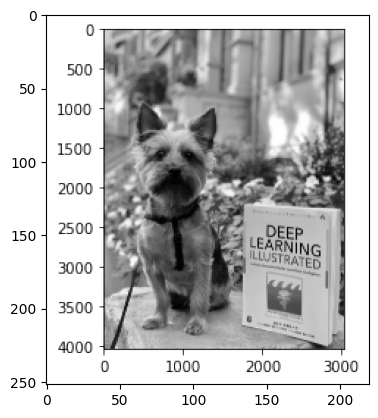

In [ ]:
img_gray = img.convert('LA')
plt.imshow(img_gray)    # here this image is an 2D matrix which contain 4000 rows and 3000 cols and at every element contain the number which represent how dark it ia

## Converting image into numoy matrix which doesn't impact image data

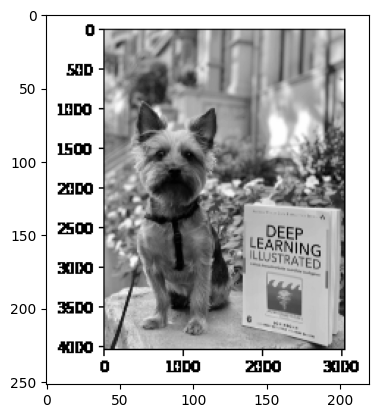

In [ ]:
imgmat = np.array(list(img_gray.getdata(band=0)), float)
imgmat.shape = (img_gray.size[1], img_gray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [ ]:
U,sigma,VT = np.linalg.svd(imgmat)

In [ ]:
reconimg = np.matrix(U[:,:1])*np.diag(sigma[:1])*np.matrix(VT[:1,:])
#reconimg

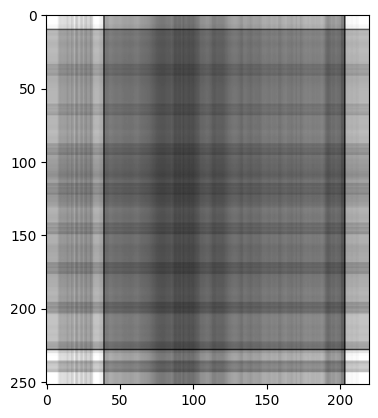

In [ ]:
plt.imshow(reconimg,cmap='gray') # As first left singular vector of U and 1st diagonal element of sigma anf first right singular vector of VT are the most imp one

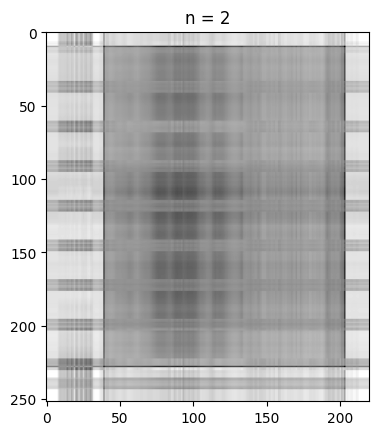

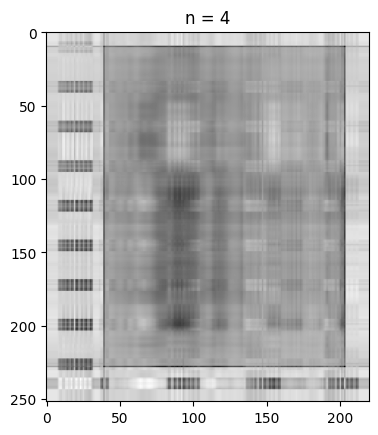

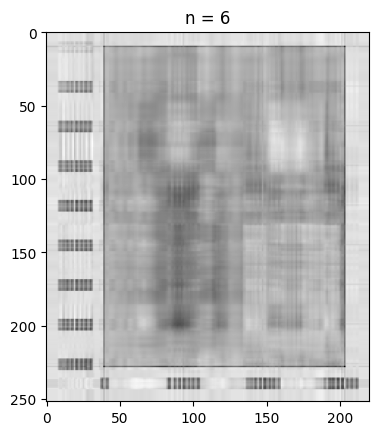

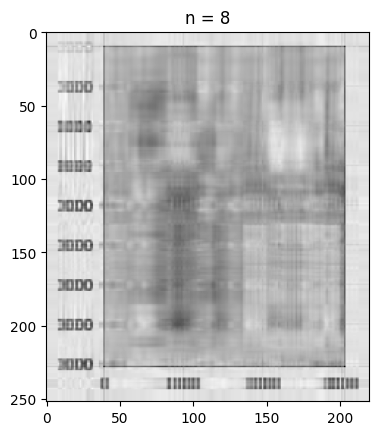

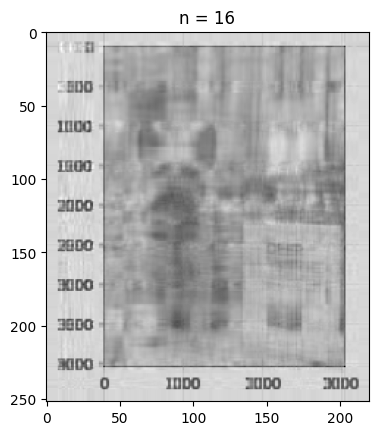

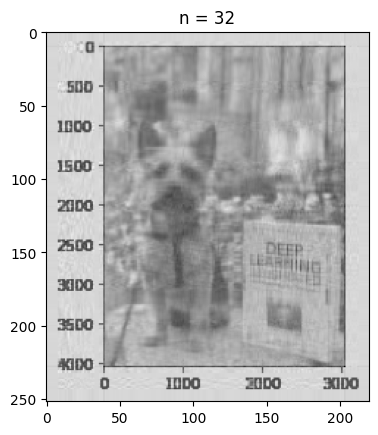

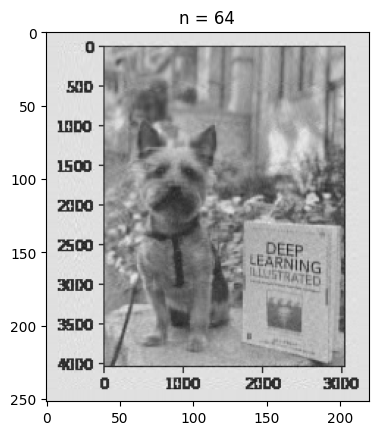

In [ ]:
for i in [2,4,6,8,16,32,64]:
  reconimg = np.matrix(U[:,:i])*np.diag(sigma[:i])*np.matrix(VT[:i,:])
  plt.imshow(reconimg,cmap='gray')
  title = "n = %s" %i
  plt.title(title)
  plt.show()

With  64singular vectors we get the decent image of the original image altthough the clarity is some what dull

In [ ]:
imgmat.shape

(252, 220)

In [ ]:
full_repr = 252*220
full_repr

55440

In [ ]:
svd_repr = 252*64 + 64 + 220*64
svd_repr

30272

In [ ]:
svd_repr/full_repr

0.546031746031746

## Moore Penrose PseudoInverse
https://chatgpt.com/c/80105106-36d2-45d9-8958-630348d471ee

In [ ]:
A = np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [ ]:
U,D,VT = np.linalg.svd(A)

In [ ]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [ ]:
D

array([8.66918448, 4.10429538])

In [ ]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [ ]:
# As D is a diagoal matrix we can invert its diagonal elements by inverting that
1/8.669

0.11535355865728457

In [ ]:
1/4,104

(0.25, 104)

In [ ]:
Dinv = np.linalg.inv(np.diag(D))
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

In [ ]:
Dplus = np.concatenate((Dinv,np.array([[0,0]]).T),axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

In [ ]:
np.dot(VT.T,np.dot(Dplus,U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [ ]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [ ]:
A_p = torch.tensor([[-1, 2], [3, -2], [5, 7.]])
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [ ]:
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

Solving unknowns for the non symmetric cases  using PseudoInverse

In [ ]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

In [ ]:
title = "Clinical Trial"
x_Label = "Dosage in ml"
y_Label = "Forgetfulness Score"

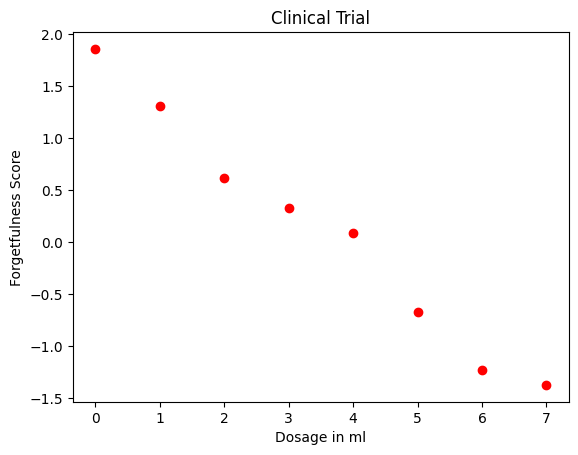

In [ ]:
fig,ax = plt.subplots()
plt.title(title)
plt.xlabel(x_Label)
plt.ylabel(y_Label)
ax.scatter(x1,y,color='red')

In [ ]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = np.concatenate((np.matrix(x0).T,np.matrix(x1).T),axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

In [ ]:
w = np.dot(np.linalg.pinv(X),y)
w   # First value i.e 1.76 is the Y intercept and the second value is the slope of the line

matrix([[ 1.76      , -0.46928571]])

In [ ]:
b = np.asarray(w).reshape(-1)[0]
b

1.7599999999999985

In [ ]:
m = np.asarray(w).reshape(-1)[1]
m

-0.4692857142857139

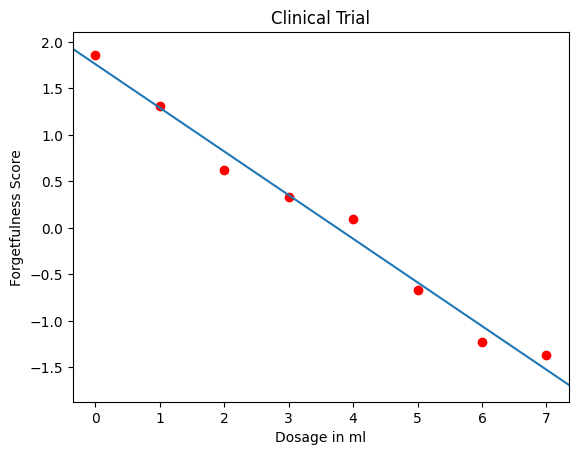

In [ ]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(x_Label)
plt.ylabel(y_Label)
ax.scatter(x1,y,color='red')

x_min,x_max = ax.get_xlim()
y_min,y_max = m*x_min+b,m*x_max+b

ax.set_xlim(x_min,x_max)
ax.plot([x_min,x_max],[y_min,y_max])






## Trace Operator
It is simply the sum of all diagonal elements

In [ ]:
A = np.array([[25,2],[5,4]])
A

array([[25,  2],
       [ 5,  4]])

In [ ]:
25+4

29

In [ ]:
np.trace(A)

29

The trace operator has many useful properties
Eg
- Tr(A) = Tr(transpose(A))
- if the size of A,B,C match up then Tr(ABC) = Tr(BCA) = Tr(CAB)

And one more useful case is Trace operator is useful to calculate Ferbenius Norm of a Matrix

https://chatgpt.com/c/edfee61a-2ed7-4e4a-9f0e-3f6e04b0024b

In [ ]:
A_p = torch.tensor([[25,2],[5,4.]])
A_p

tensor([[25.,  2.],
        [ 5.,  4.]])

In [ ]:
torch.trace(A_p)

tensor(29.)

In [ ]:
torch.norm(A_p)

tensor(25.8844)

In [ ]:
(torch.trace(torch.matmul(A_p,A_p.T)))**0.5

tensor(25.8844)

## Principal Componenet Analysis
https://chatgpt.com/c/711dc4a3-a37d-491e-84ee-37f7eacff99d

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.get('feature_names')   # These are the features of a dataset

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data[:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
X = pca.fit_transform(iris.data)

In [ ]:
X.shape

(150, 2)

In [ ]:
X[:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

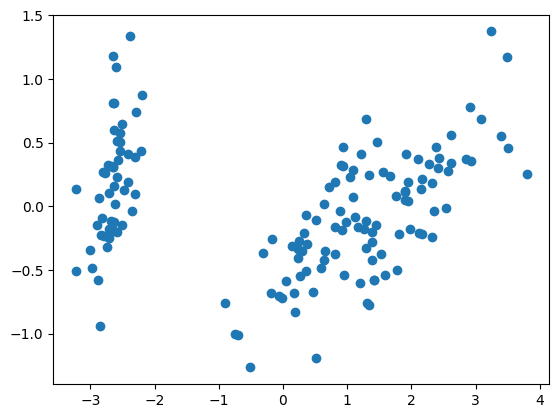

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
iris.target.shape   # iris.target attribute contains the labels of the components anh here it is showing that it containss 150 items

(150,)

In [ ]:
unique_elements,count_elements = np.unique(iris.target,return_counts=True)
np.asarray((unique_elements,count_elements))   # Here the data contains 3 unique element and these three elements has 50 components

array([[ 0,  1,  2],
       [50, 50, 50]])

In [ ]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

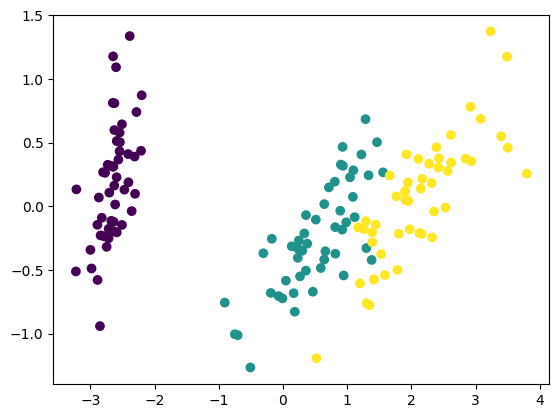

In [ ]:
plt.scatter(X[:,0],X[:,1],c=iris.target)